 <font color='744fdb' size=6> **Метод главных компонент (principal component analysis, PCA)**


In [1]:
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.arange(1,21)
y = 2 * x + np.random.randn(20)*2

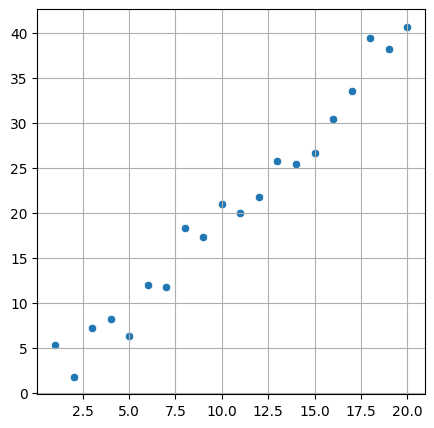

In [3]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x, y=y)
plt.grid(True)
plt.show()

In [4]:
# центрируем
x_centr = x - x.mean()
y_centr = y - y.mean()

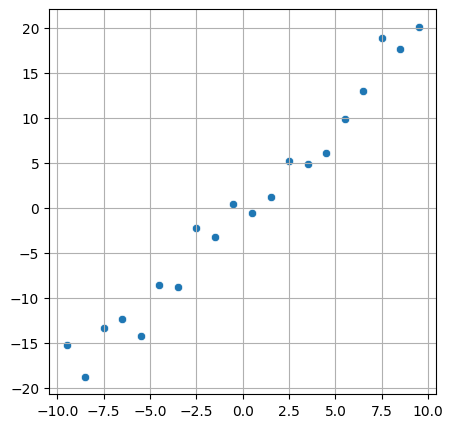

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x_centr, y=y_centr)
plt.grid(True)
plt.show()

Ковариационная матрица - это матрица, у которой $ (i,j) $-элемент является корреляцией признаков $(X_i, X_j)$. Вспомним формулу ковариации:
$$
Cov(X_i, X_j) = E \left[ (X_i - E(X_i)) \cdot (X_j - E(X_j)) \right] = E(X_i X_j) - E(X_i) \cdot E(X_j)
$$

В нашем случае она упрощается, так как $E(X_i) = E(X_j) = 0$:
$$
Cov(X_i, X_j) = E(X_i X_j)
$$

Заметим, что когда $X_i = X_j$:
$$
Cov(X_i, X_i) = Var(X_i)
$$

и это справедливо для любых случайных величин.


Замечание: Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.

In [6]:
X_centr = np.vstack((x_centr, y_centr))

In [7]:
covmat = np.cov(X_centr)

In [8]:
covmat

array([[ 35.        ,  69.64844832],
       [ 69.64844832, 142.80615794]])

Найдем вектор, при котором максимизировался бы  размер (дисперсия) проекции нашей выборки на него

Рассмотрим выборку данных $X$ и вектор направления $w$. Проекция данных $X$ на $w$ определяется как $Xw$. Нам нужно максимизировать дисперсию этой проекции, которая вычисляется как:
$$
\text{Var}(Xw) = w^T Q w
$$

Для нахождения $w$, которое максимизирует дисперсию, необходимо нормировать $w$ так, чтобы $w^T w = 1$.

Формулируем задачу оптимизации:
$$
\max_{w} \, w^T Q w \quad \text{при условии} \quad w^T w = 1
$$

Для решения этой задачи используем метод Лагранжа. Записываем лагранжиан:
$$
L(w, \lambda) = w^T Q w - \lambda (w^T w - 1)
$$

Находим производные по $w$ и $\lambda$ и приравниваем их к нулю:
$$
\frac{\partial L}{\partial w} = 2Q w - 2\lambda w = 0
$$
$$
Q w = \lambda w
$$

Это и есть определение собственного вектора и собственного значения.

Собственные значения $\lambda$ представляют дисперсии вдоль направлений, определяемых соответствующими собственными векторами. Для максимизации дисперсии нужно выбрать вектор, соответствующий наибольшему собственному значению.


Таким образом, направление максимальной дисперсии у проекции всегда совпадает с собственным вектором, имеющим максимальное собственное значение.

###Пример расчета собственнх значений



Предположим, у нас есть ковариационная матрица:
$$
Q = \begin{pmatrix}
4 & 2 \\
2 & 3
\end{pmatrix}
$$

Найдём собственные значения и векторы:

1. Решаем характеристическое уравнение:
$$
\det(Q - \lambda I) = 0
$$

$$
\begin{vmatrix}
4 - \lambda & 2 \\
2 & 3 - \lambda
\end{vmatrix} = 0
$$
$$
(4 - \lambda)(3 - \lambda) - 4 = \lambda^2 - 7\lambda + 8 = 0
$$
Собственные значения: $\lambda_1 = \frac{1+\sqrt{17}}{2}$, $\lambda_2 = \frac{1-\sqrt{17}}{2}$.


### продолжим

Функция `np.linalg.eig` из библиотеки NumPy вычисляет собственные значения и собственные векторы квадратной матрицы.

In [9]:
X_centr

array([[ -9.5       ,  -8.5       ,  -7.5       ,  -6.5       ,
         -5.5       ,  -4.5       ,  -3.5       ,  -2.5       ,
         -1.5       ,  -0.5       ,   0.5       ,   1.5       ,
          2.5       ,   3.5       ,   4.5       ,   5.5       ,
          6.5       ,   7.5       ,   8.5       ,   9.5       ],
       [-15.28872186, -18.76595398, -13.35682024, -12.33965416,
        -14.23761068,  -8.59339962,  -8.74250565,  -2.2785878 ,
         -3.21499286,   0.48451099,  -0.51343821,   1.16678513,
          5.2282634 ,   4.89153458,   6.09285907,   9.86374277,
         12.94753345,  18.88460233,  17.64851325,  20.12334009]])

In [10]:
a, vecs = np.linalg.eig(covmat)

In [11]:
a

array([  0.83237854, 176.97377941])

In [12]:
vecs

array([[-0.89778708, -0.44042975],
       [ 0.44042975, -0.89778708]])

In [36]:
vecs[1,1]

-0.8977870750246617

In [34]:
X_centr[1]

array([-15.28872186, -18.76595398, -13.35682024, -12.33965416,
       -14.23761068,  -8.59339962,  -8.74250565,  -2.2785878 ,
        -3.21499286,   0.48451099,  -0.51343821,   1.16678513,
         5.2282634 ,   4.89153458,   6.09285907,   9.86374277,
        12.94753345,  18.88460233,  17.64851325,  20.12334009])

In [35]:
X_centr[0]

array([-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,
        1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [37]:
X_centr[0] * vecs[0,1] + X_centr[1] * vecs[1,1]

array([ 17.91009954,  20.59148384,  15.29480373,  13.94117542,
        15.2047065 ,   9.696977  ,   9.39041271,   3.14676106,
         3.54702366,  -0.21477283,   0.24074331,  -1.70816924,
        -5.79494169,  -5.93306066,  -7.45202402, -11.27790441,
       -14.48692158, -20.25757504, -19.58825999, -22.2505573 ])

In [30]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:,1]
Xnew = np.dot(v,X_centr)

In [31]:
Xnew

array([-17.91009954, -20.59148384, -15.29480373, -13.94117542,
       -15.2047065 ,  -9.696977  ,  -9.39041271,  -3.14676106,
        -3.54702366,   0.21477283,  -0.24074331,   1.70816924,
         5.79494169,   5.93306066,   7.45202402,  11.27790441,
        14.48692158,  20.25757504,  19.58825999,  22.2505573 ])

>найдем через библиотеку

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X_centr.T)

In [26]:
XPCAreduced

array([[-17.91009954],
       [-20.59148384],
       [-15.29480373],
       [-13.94117542],
       [-15.2047065 ],
       [ -9.696977  ],
       [ -9.39041271],
       [ -3.14676106],
       [ -3.54702366],
       [  0.21477283],
       [ -0.24074331],
       [  1.70816924],
       [  5.79494169],
       [  5.93306066],
       [  7.45202402],
       [ 11.27790441],
       [ 14.48692158],
       [ 20.25757504],
       [ 19.58825999],
       [ 22.2505573 ]])

In [27]:
pca.explained_variance_ratio_

array([0.99531862])

пример применения для графиков

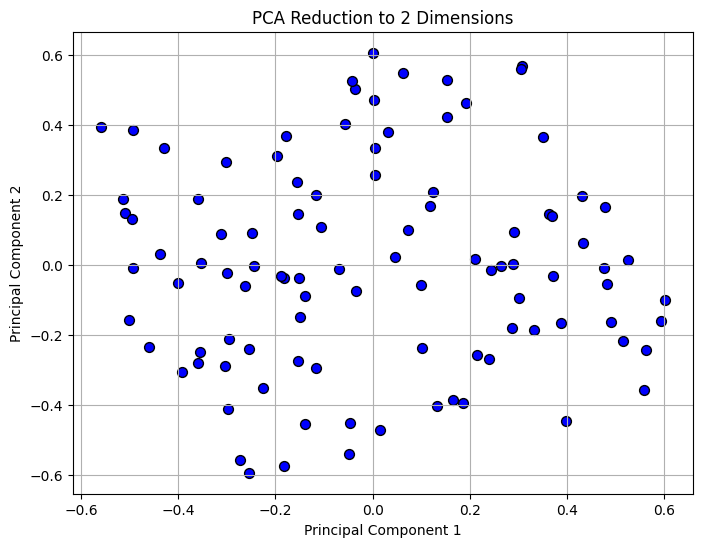

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Создание набора данных с размерностью 10
np.random.seed(42)
data = np.random.rand(100, 3)  # 100 образцов с 10 признаками

# Применение PCA для снижения размерности до 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [22]:
# Расчет сохраненной и потерянной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)
lost_variance = 1 - total_explained_variance

In [23]:
total_explained_variance

0.713895191661746

In [24]:
lost_variance

0.286104808338254